In [1]:
from googletrans import Translator
import pandas as pd

c:\Users\User\.conda\envs\UW\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\User\.conda\envs\UW\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\User\.conda\envs\UW\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#LOAD DATAFRAME AND FILTER
US_stocks_df = pd.read_csv('datasets/US_stocks.csv')
US_stocks_df.drop(['Ticker', 'Company Name', 'Comment'], inplace=True, axis=1)
US_stocks_sector_df = US_stocks_df.drop(['Industry Group', 'Industry', 'Sub-Industry'], axis=1)
US_stocks_sector_df.to_csv('datasets/US_stocks_sectors.csv', index=False)

In [3]:
#DICTIONARY TO COUNT SECTORS AND BALANCE THE FINAL DF
sector_dic_count={}

sector_lst = US_stocks_sector_df['Sector'].unique()

for sector in sector_lst:
    sector_dic_count[sector] = 0

#sector_dic_count


{'Materials': 0,
 'Consumer Staples': 0,
 'Real Estate': 0,
 'Industrials': 0,
 'Energy': 0,
 'Consumer Discretionary': 0,
 'Information Technology': 0,
 'Communication Services': 0,
 'Financials': 0,
 'Health Care': 0,
 'Utilities': 0}

In [4]:
#BUILDING THE DIC TO AFTER TRANSFORM INTO DATAFRAME
dic_df={
    'Description': [],
    'Sector': []
}

for idx, row in US_stocks_sector_df.iterrows():
    if sector_dic_count[row['Sector']] < 10:
        dic_df['Description'].append(row['Description'])
        dic_df['Sector'].append(row['Sector'])
        sector_dic_count[row['Sector']]+=1
    #print(f"Sector: {row['Sector']} - Dic Value: {sector_dic_count[row['Sector']]}")

In [5]:
#dic_df

In [6]:
#sector_dic_count

In [7]:
US_stocks_sector_balanced_df = pd.DataFrame(dic_df)

In [8]:
US_stocks_sector_balanced_df

,Description,Sector
0,"Corteva, Inc. is a global provider of seed and...",Materials
1,"Alico, Inc. is an agribusiness and land manage...",Consumer Staples
2,Limoneira Company is primarily an agribusiness...,Consumer Staples
3,S&W Seed Company (S&W) is a multi-crop and mid...,Consumer Staples
4,Tejon Ranch Co. is a diversified real estate d...,Real Estate
...,...,...
105,"CTO Realty Growth, Inc. is a real estate inves...",Real Estate
106,"Kennedy-Wilson Holdings, Inc. is a real estate...",Real Estate
107,"FRP Holdings, Inc. is a holding company, which...",Real Estate
108,"Gyrodyne, LLC is engaged in the business of in...",Real Estate


In [9]:
#SAVE THE BALANCED DATAFRAME
US_stocks_sector_balanced_df.to_csv('datasets/US_stocks_sector_balanced.csv', index=False)

In [10]:
#TRANSLATE THE DATAFRAME
'''from googletrans import Translator

translator = Translator()

sectors_description = US_stocks_sector_balanced_df['Description']

type(sectors_description)

translations = translator.translate(sectors_description, dest='pt')
for translation in translations:
    print(translation)'''

"from googletrans import Translator\n\ntranslator = Translator()\n\nsectors_description = US_stocks_sector_balanced_df['Description']\n\ntype(sectors_description)\n\ntranslations = translator.translate(sectors_description, dest='pt')\nfor translation in translations:\n    print(translation)"

In [44]:
#HISTOGRAM TO SEE THE LABEL DISTRIBUTION
import matplotlib.pyplot as plt

def plot_histogram(data, types, filename):
    # Extract the items and their frequencies from the dictionary
    items = list(data.keys())
    frequencies = list(data.values())

    # Create a bar plot using matplotlib
    plt.bar(items, frequencies)

    # Rotate the tick labels to display them vertically
    plt.xticks(rotation='vertical')

    # Add labels and title
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.title(types)

     # Save the plot to the specified filename
    plt.savefig(filename)

    # Display the plot
    plt.show()

In [64]:
#LABEL FREQUENCY
label_freq={}

types= 'Industry Group'

df_labels = pd.read_csv('datasets/US_stocks.csv')

df_labels.drop(['Description', 'Ticker', 'Company Name', 'Comment'], inplace=True, axis=1)

df_type = df_labels[types]

df_label_freq = {}

for label in df_type:
    if label in df_label_freq.keys():
        df_label_freq[label]+=1
    else:
        df_label_freq[label] = 1


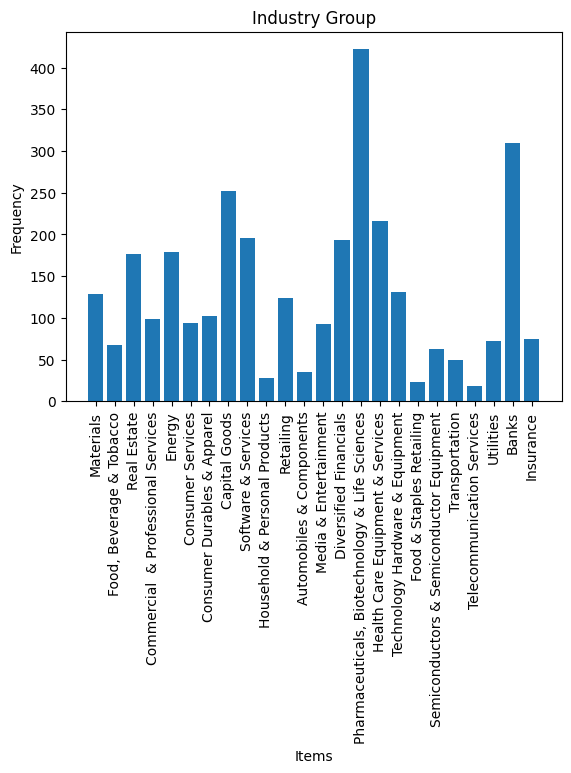

In [65]:
plot_histogram(df_label_freq, types, f"graphs/{types.lower().replace('-','_').replace(' ', '_')}_hist.png")